# Fitting ODE solution to concentration data 
 * with arbitrary rate function with
   * unspecified order n and rate constant k
 * $ rate = \frac{dc}{dt} = k \cdot c^n $
 
Anleitung:
  1. Type the measured data into the field under chapter 2
  2. Press "Restart Kernel and run all cells"

## 1. Prepare

### 1.1 Import python libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

### 1.2 Define function DoH(BI)

In [2]:
def DoH_BI(BI): # aus Diss von M. Geißelbrecht 2020
    DoH_BI =  (27.447*BI**2 - 94.278*BI +80.371)  
    return DoH_BI

### 1.3 Fit using scipy.curve_fit with odeint solution to nth_order function
 * $ fitfunc(DoH, t)(k,n): \frac{\partial DoH}{\partial t} = -k \cdot DoH^n $

In [3]:
def dcdt_fit(df):
    tspan = df['t /min']
    DoH_data = df['DoH']

    def fitfunc(t, k, n):
        'Function that returns DoH computed from an ODE for k and n'
        def myode(DoH, t):
            return -k * DoH**n

        DoH0 = DoH_data[0]
        DoHsol = odeint(myode, DoH0, t)
        return DoHsol[:,0]

    p0 = 2*10**(-4), 1
    bounds=([0, .5],[float('Inf'), 2.]) # k =e[0,Inf] und n =e[1,2]
    kn_fit, kncov,  = curve_fit(fitfunc, tspan, DoH_data, p0=p0, bounds=bounds)
    # print('k = ' + str(kn_fit[0]) + ' | n = ' + str(kn_fit[1]))

    tfit = np.linspace(np.min(tspan), np.max(tspan), 100);
    fit = fitfunc(tfit, *kn_fit)

    f = plt.figure()
    rect = ([0,0,1,1]) # rect = [left, bottom, width, height]
    ax = f.add_axes(rect)
    ax.set_ylim(0,1)
    ax.plot(tspan, DoH_data, 'ro', label='data')
    ax.plot(tfit, fit, 'b-', label='fit')
    ax.legend(loc='best')

    str_kinetik = '$\\frac{\\partial DoH}{\\partial t} = k \cdot DoH^n = $' + '{:.4e}'.format(kn_fit[0]) + '$\\cdot DoH^{' + '{:3.4f}'.format(kn_fit[1]) + '}$'
    ax.text(np.min(tspan), 0.05, str_kinetik, color='blue')
    
    k = kn_fit[0]
    n = kn_fit[1]
    
    return k, n

## 2. t/min and BI/nd

&#8594; Eingabe der Messzeitpukte in min sowie der BI_1 und BI_2 Messungen (oder direkt des BI_mean)
<br>*(In Notepad++ lassen sich über Suchen/Ersetzen "\r\n" durch "," ersetzen um Leerzeilen zu entfernen)*

In [4]:
t = 0,15,30,60,120,180,240,300,360,420,480,540,1466,1648,1750
BI_1 = 1.4782,1.4800,1.4809,1.4824,1.4862,1.4886,1.4914,1.4938,1.4959,1.4984,1.5010,1.5032,1.5362,1.5416,1.5456,
BI_2 = 1.4783,1.4798,1.4811,1.4823,1.4861,1.4884,1.4909,1.4938,1.4958,1.4984,1.501,1.5031,1.5363,1.5416,1.5456,

BI_mean = np.mean([BI_1, BI_2], axis=0)
print(BI_mean)

[1.47825 1.4799  1.481   1.48235 1.48615 1.4885  1.49115 1.4938  1.49585
 1.4984  1.501   1.50315 1.53625 1.5416  1.5456 ]


## 3. Make pretty dataframe, display plot and results from measurements

k = 0.0007036130055591324 | n = 0.7887209540802983


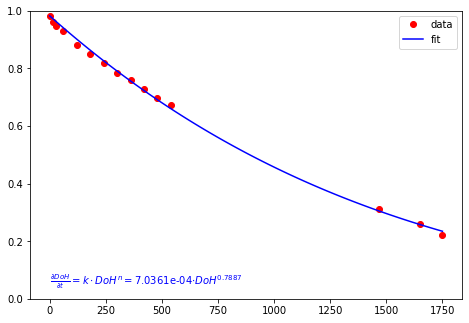

In [7]:
df = pd.DataFrame(BI_mean, t).reset_index()
df.columns = ['t /min', 'BI_mean']
df['DoH'] = DoH_BI(df[['BI_mean']])

df

k, n = dcdt_fit(df)
print('k = ' + str(k) + ' | n = ' + str(n))